In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Norm, Stan, Robust, log

In [257]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_w_lag.csv',header = 0)
features = ['Chl_current','Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_1m_lag'])
y = df["Chl_1m_lag"]

In [223]:
x.head()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,2.540000,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,3.759632,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,2.860000,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,3.692863,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,5.130000,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


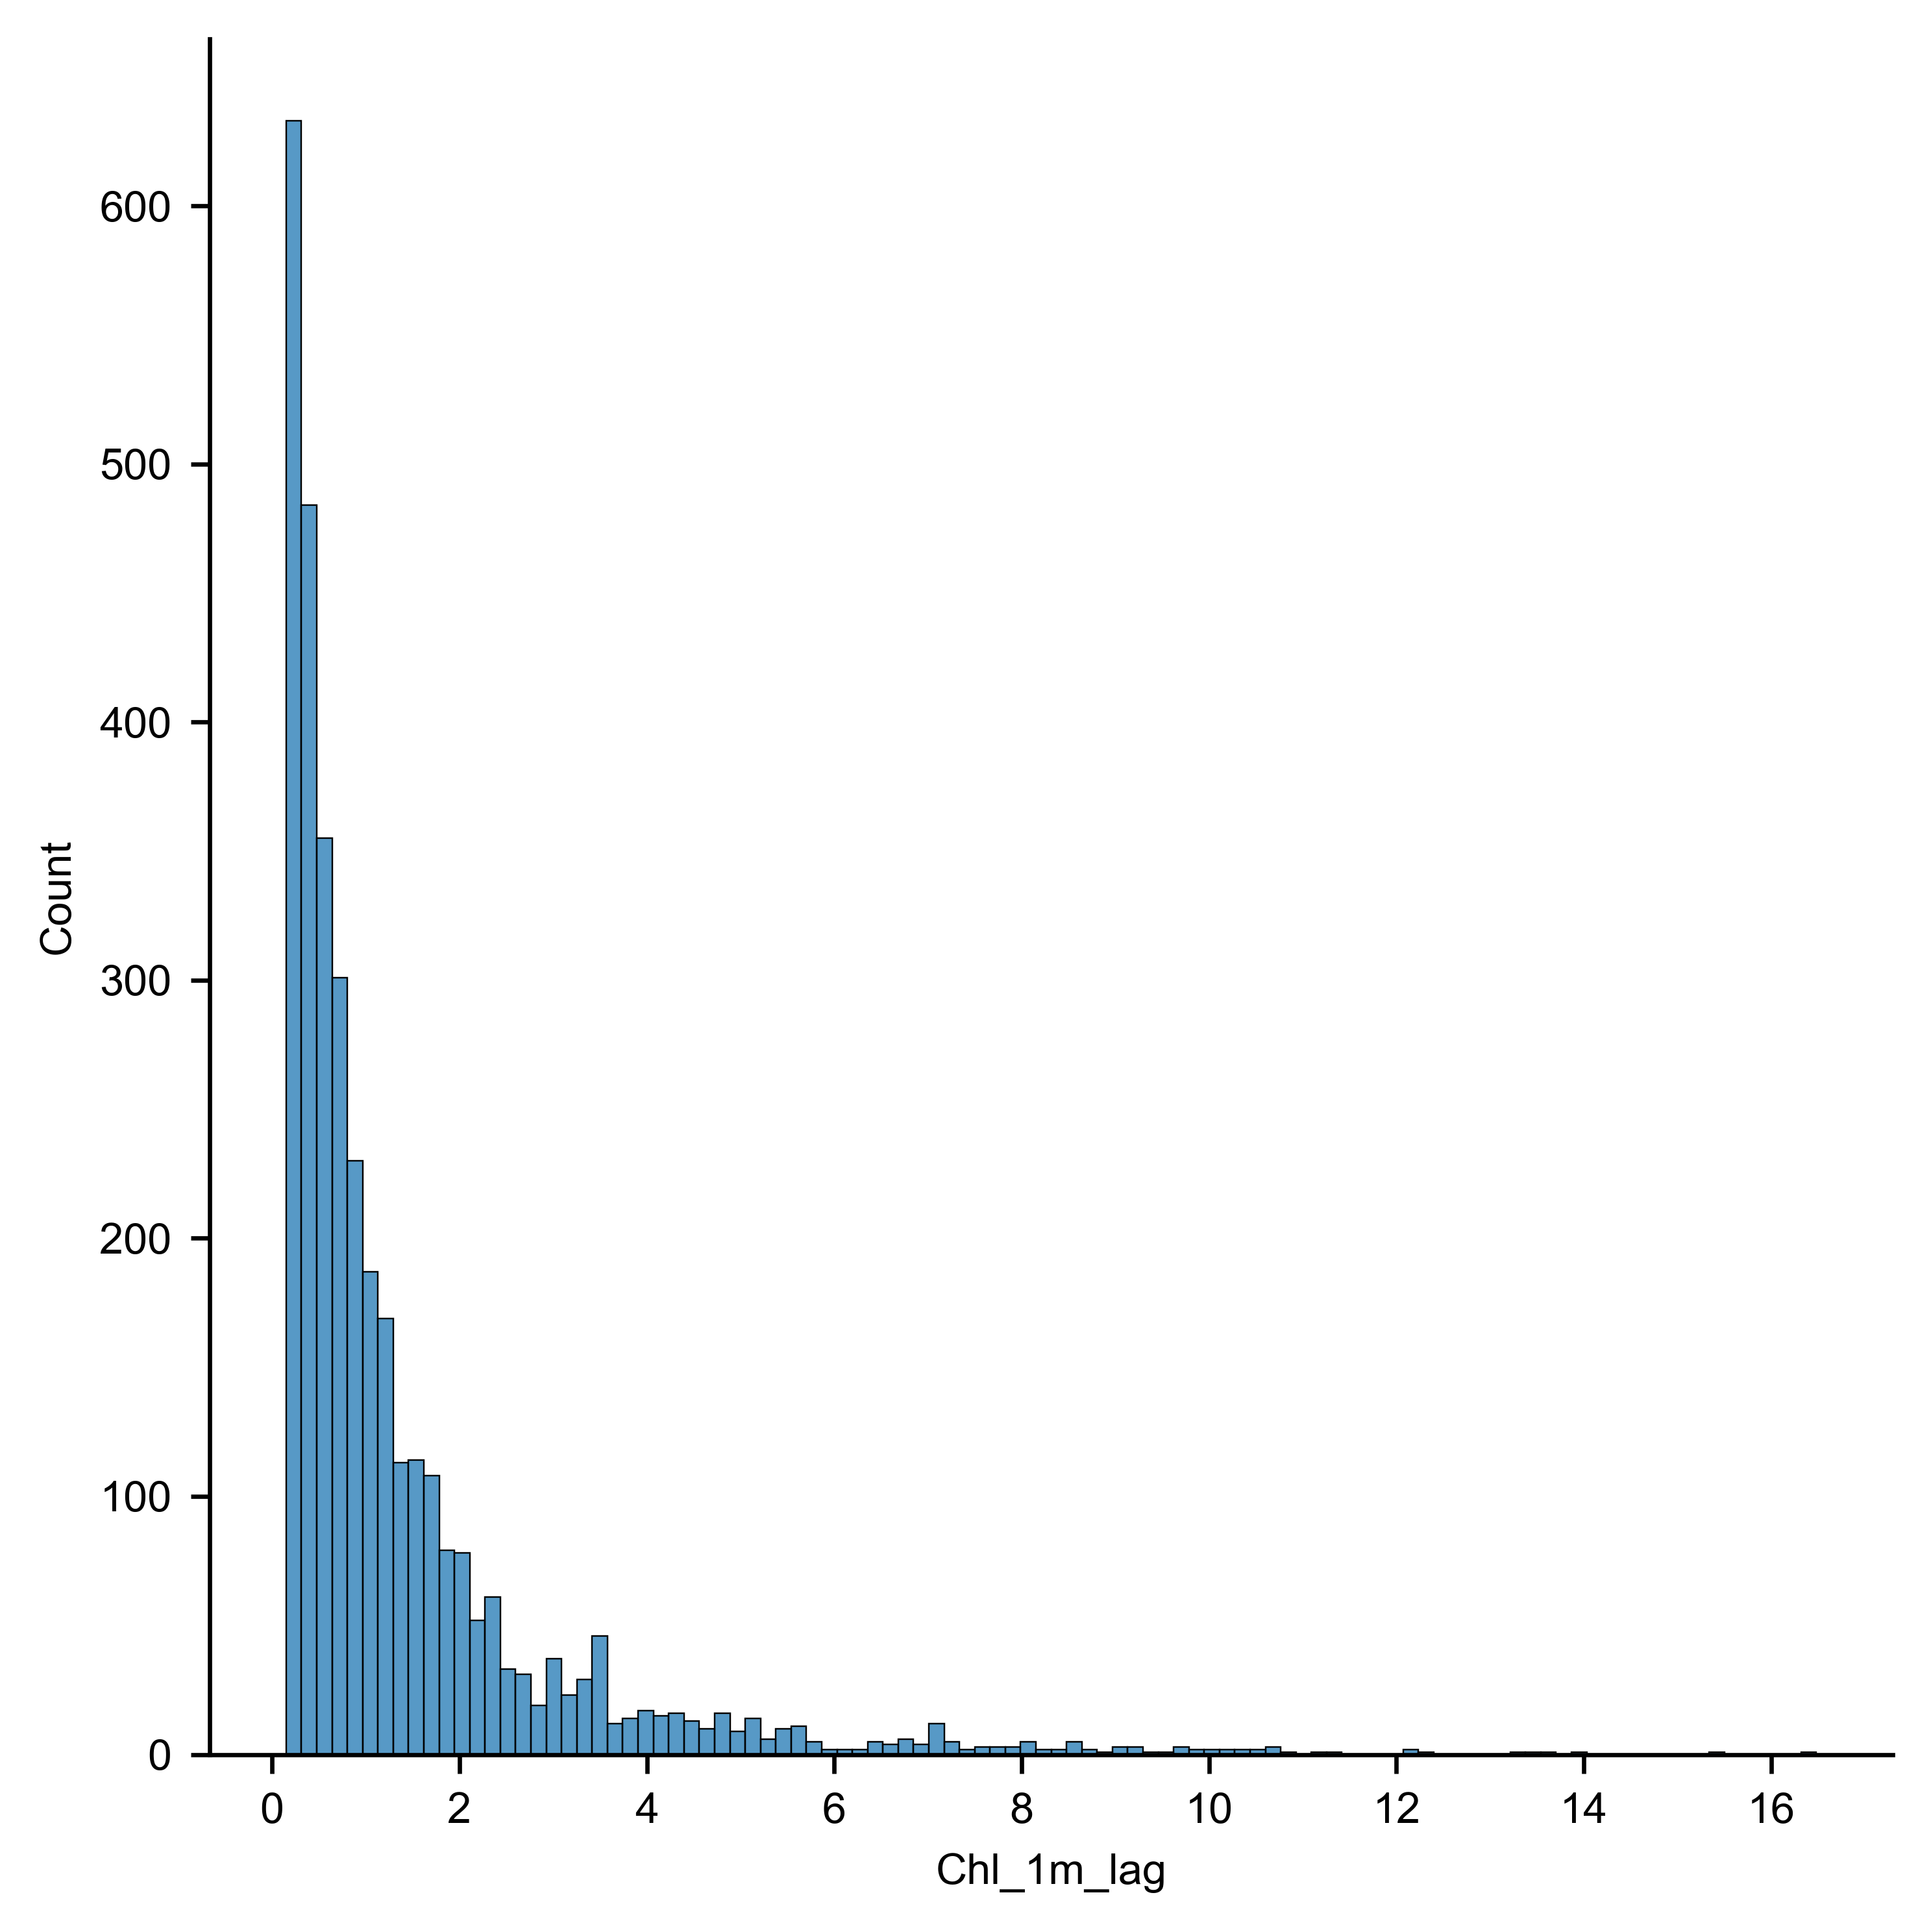

In [252]:
sns.displot(y)

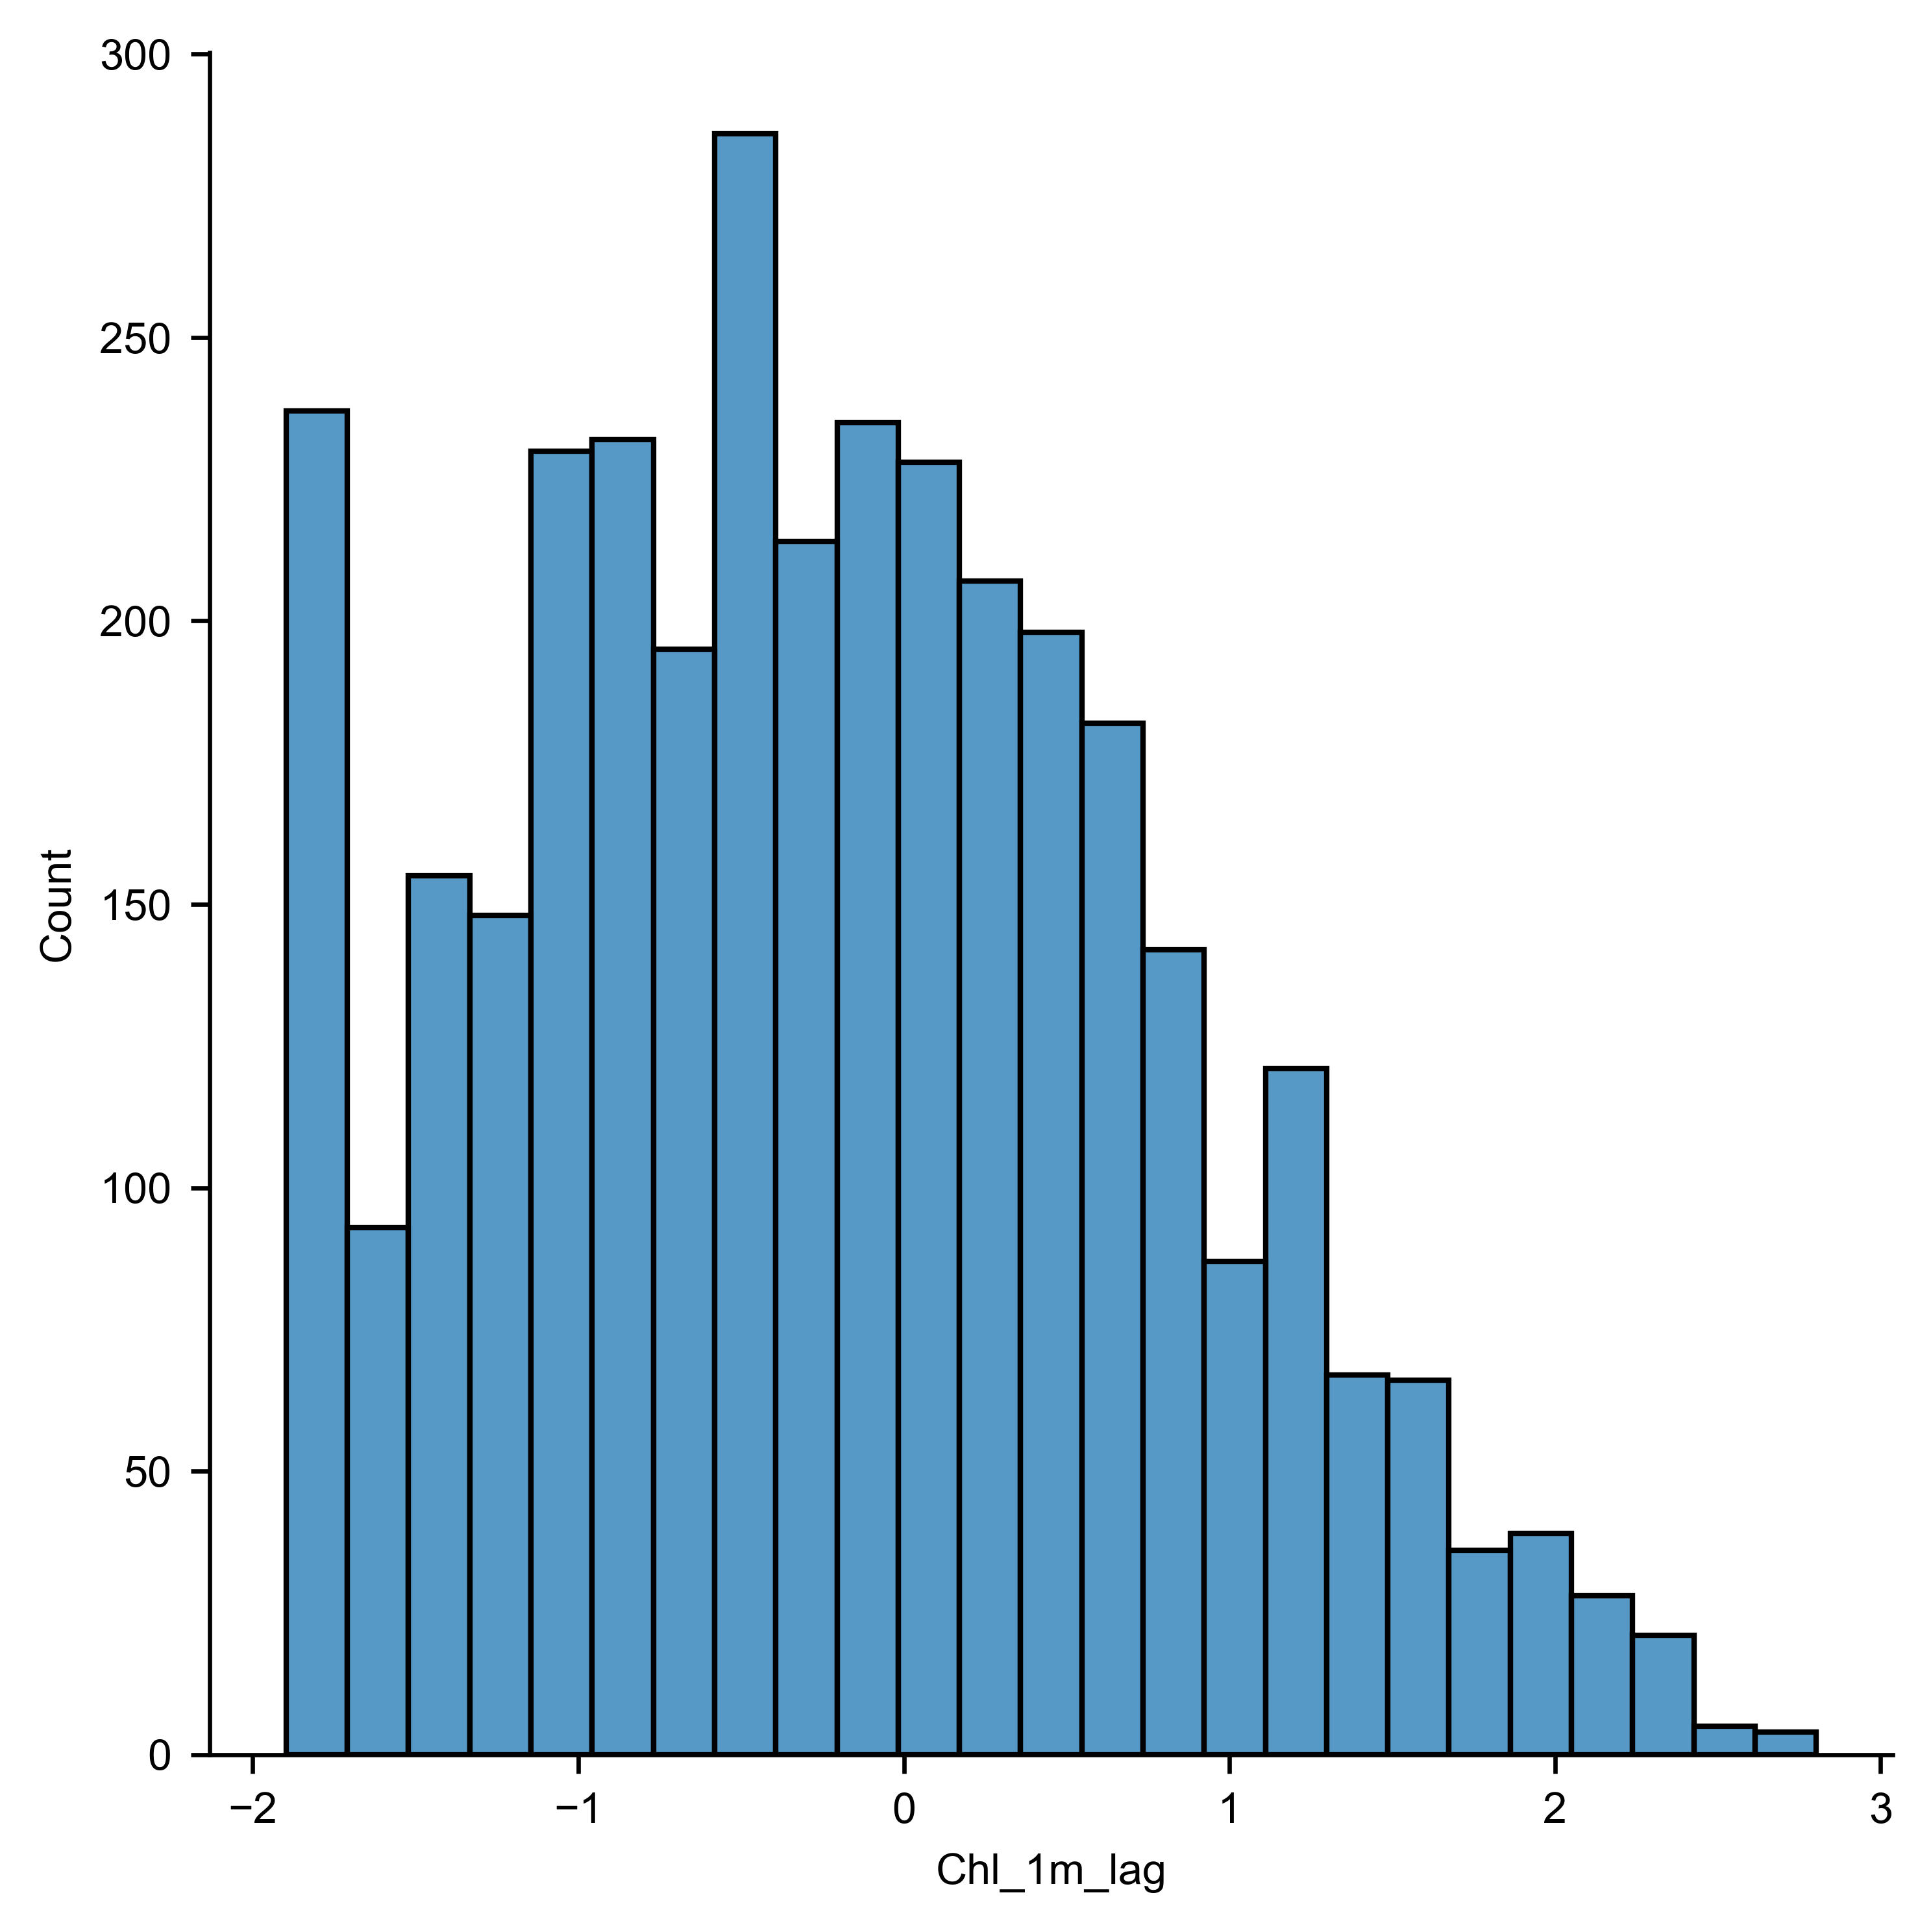

In [254]:
sns.displot(np.log(y))

In [224]:
features = list(x.columns)
features

['Chl_current',
 'Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [225]:
# extract data from csv
# train_data = pd.read_csv('D:/PycharmProjects/pythonProject/train_data_w_lag.csv',header = 0)
# test_data = pd.read_csv('D:/PycharmProjects/pythonProject/test_data_w_lag.csv',header = 0)

In [226]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [258]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [24]:
# Grid search

best_score = 0
for max_depth in [50, 200, 500, 800, 1000, 1200]:
    for min_samples_split in [2, 10, 18, 26, 34, 42]:
        for min_samples_leaf in [3, 11, 19, 27, 35, 43]:
            for max_features in [0.8, 0.9, 1.0]:
                
                DTR = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                           max_features=max_features)
                DTR.fit(Xtrain,Ytrain)
                score = DTR.score(Xtest,Ytest)
                if score > best_score:
                    best_score = score
                    best_parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                      'max_features':max_features}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score:0.38
Best parameters:{'max_depth': 200, 'min_samples_split': 26, 'min_samples_leaf': 35, 'max_features': 0.8}


In [63]:
# Grid search

best_score = 0
for max_depth in [50, 200, 500, 800, 1000, 1200]:
    for min_samples_split in [2, 10, 18, 26, 34, 42]:
        for min_samples_leaf in [3, 11, 19, 27, 35, 43]:
            for max_features in [0.8, 0.9, 1.0]:
                
                DTR = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                           max_features=max_features)
                DTR.fit(Xtrain,Ytrain)
                score = DTR.score(Xtest,Ytest)
                if score > best_score:
                    best_score = score
                    best_parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                      'max_features':max_features}


print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score:0.40
Best parameters:{'max_depth': 200, 'min_samples_split': 26, 'min_samples_leaf': 35, 'max_features': 0.8}


In [306]:
# Decision Tree

# 1.Model
DTR = DecisionTreeRegressor(max_depth = 200, min_samples_split = 26, min_samples_leaf = 35, max_features = 0.8)

# 2.Train
DTR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = DTR.predict(Xtrain)
y_predict_xtest = DTR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.5749167675954223
R2 for test: 0.3934465963570387
MAE for train: 0.6045555287822766
MAE for test: 0.7469158195194727
MSE for train: 1.2687665385824887
MSE for test: 1.7572383574364716
MAPE for train 0.670997965831783
MAPE for test 0.5583980419959361


In [307]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

67.09979658317829

NO BIG DIFFERENCE WITH log-transformation for Y

In [ ]:
# log
y_log = np.log(y)

Xtrain = x[:2736]
Ytrain_log = y_log[:2736]
Xtest = x.tail(720)
Ytest_log = y_log.tail(720)

In [492]:
# log y


DTR = DecisionTreeRegressor(max_depth = 200, min_samples_split = 26, min_samples_leaf = 35, max_features = 0.8)

# 2.Train
DTR.fit(Xtrain,Ytrain_log)

# 3.Scores
y_predict_xtrain = np.exp(DTR.predict(Xtrain))
y_predict_xtest = np.exp(DTR.predict(Xtest))

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.49904393987591034
R2 for test: 0.35818141602990383
MAE for train: 0.6016637286576213
MAE for test: 0.7500949858437428
MSE for train: 1.4952278470034466
MSE for test: 1.859404674830072
MAPE for train 0.5167385060342461
MAPE for test 0.5284552970476539


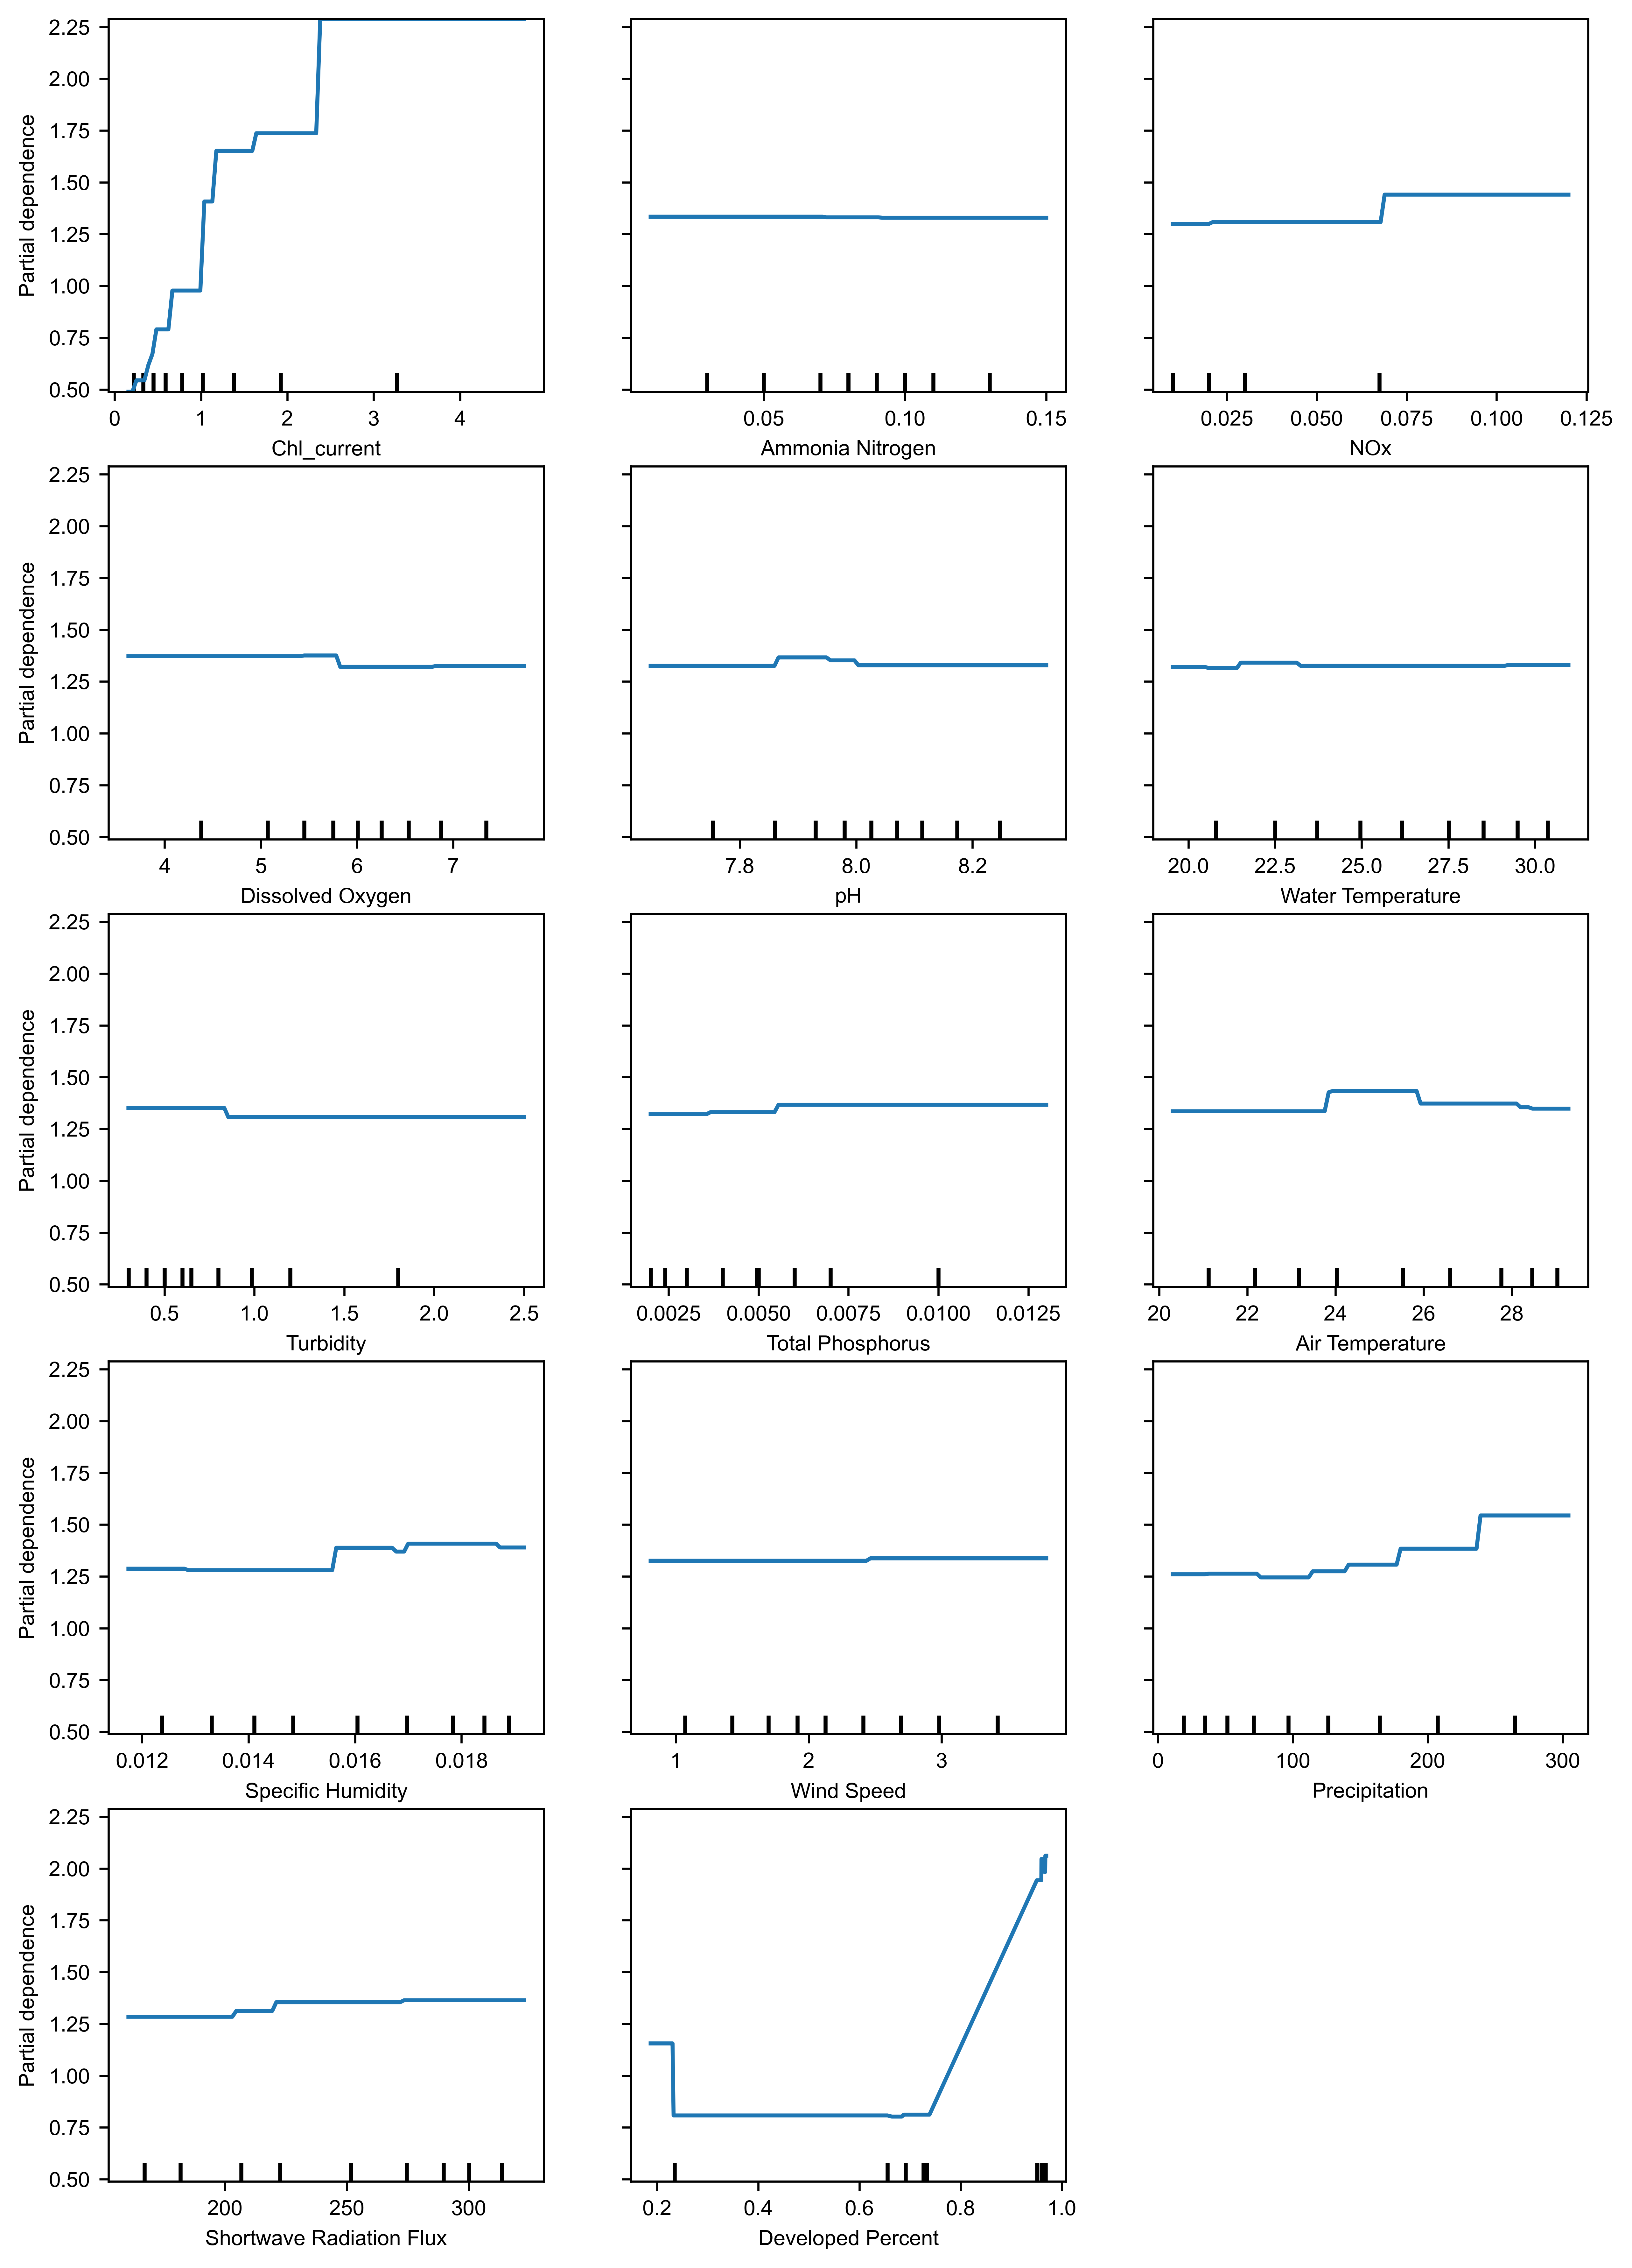

In [308]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':600,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(DTR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [309]:
importance = DTR.feature_importances_
print(importance)
print([*zip(features,DTR.feature_importances_)])

[6.72423853e-01 4.69909784e-05 1.89519023e-02 1.09450104e-03
 6.97885344e-03 1.01271031e-03 4.78604575e-03 7.60973764e-04
 1.23631034e-02 6.45964035e-03 7.06552675e-04 4.68873849e-02
 5.24015205e-03 2.22287336e-01]
[('Chl_current', 0.6724238531007777), ('Ammonia Nitrogen', 4.699097844904989e-05), ('NOx', 0.018951902323351796), ('Dissolved Oxygen', 0.0010945010384242149), ('pH', 0.006978853440734833), ('Water Temperature', 0.0010127103124683387), ('Turbidity', 0.004786045750840493), ('Total Phosphorus', 0.0007609737640880096), ('Air Temperature', 0.012363103426707657), ('Specific Humidity', 0.006459640346484133), ('Wind Speed', 0.0007065526745376736), ('Precipitation', 0.04688738491012321), ('Shortwave radiation flux', 0.005240152045863297), ('Developed Percent', 0.22228733588714972)]


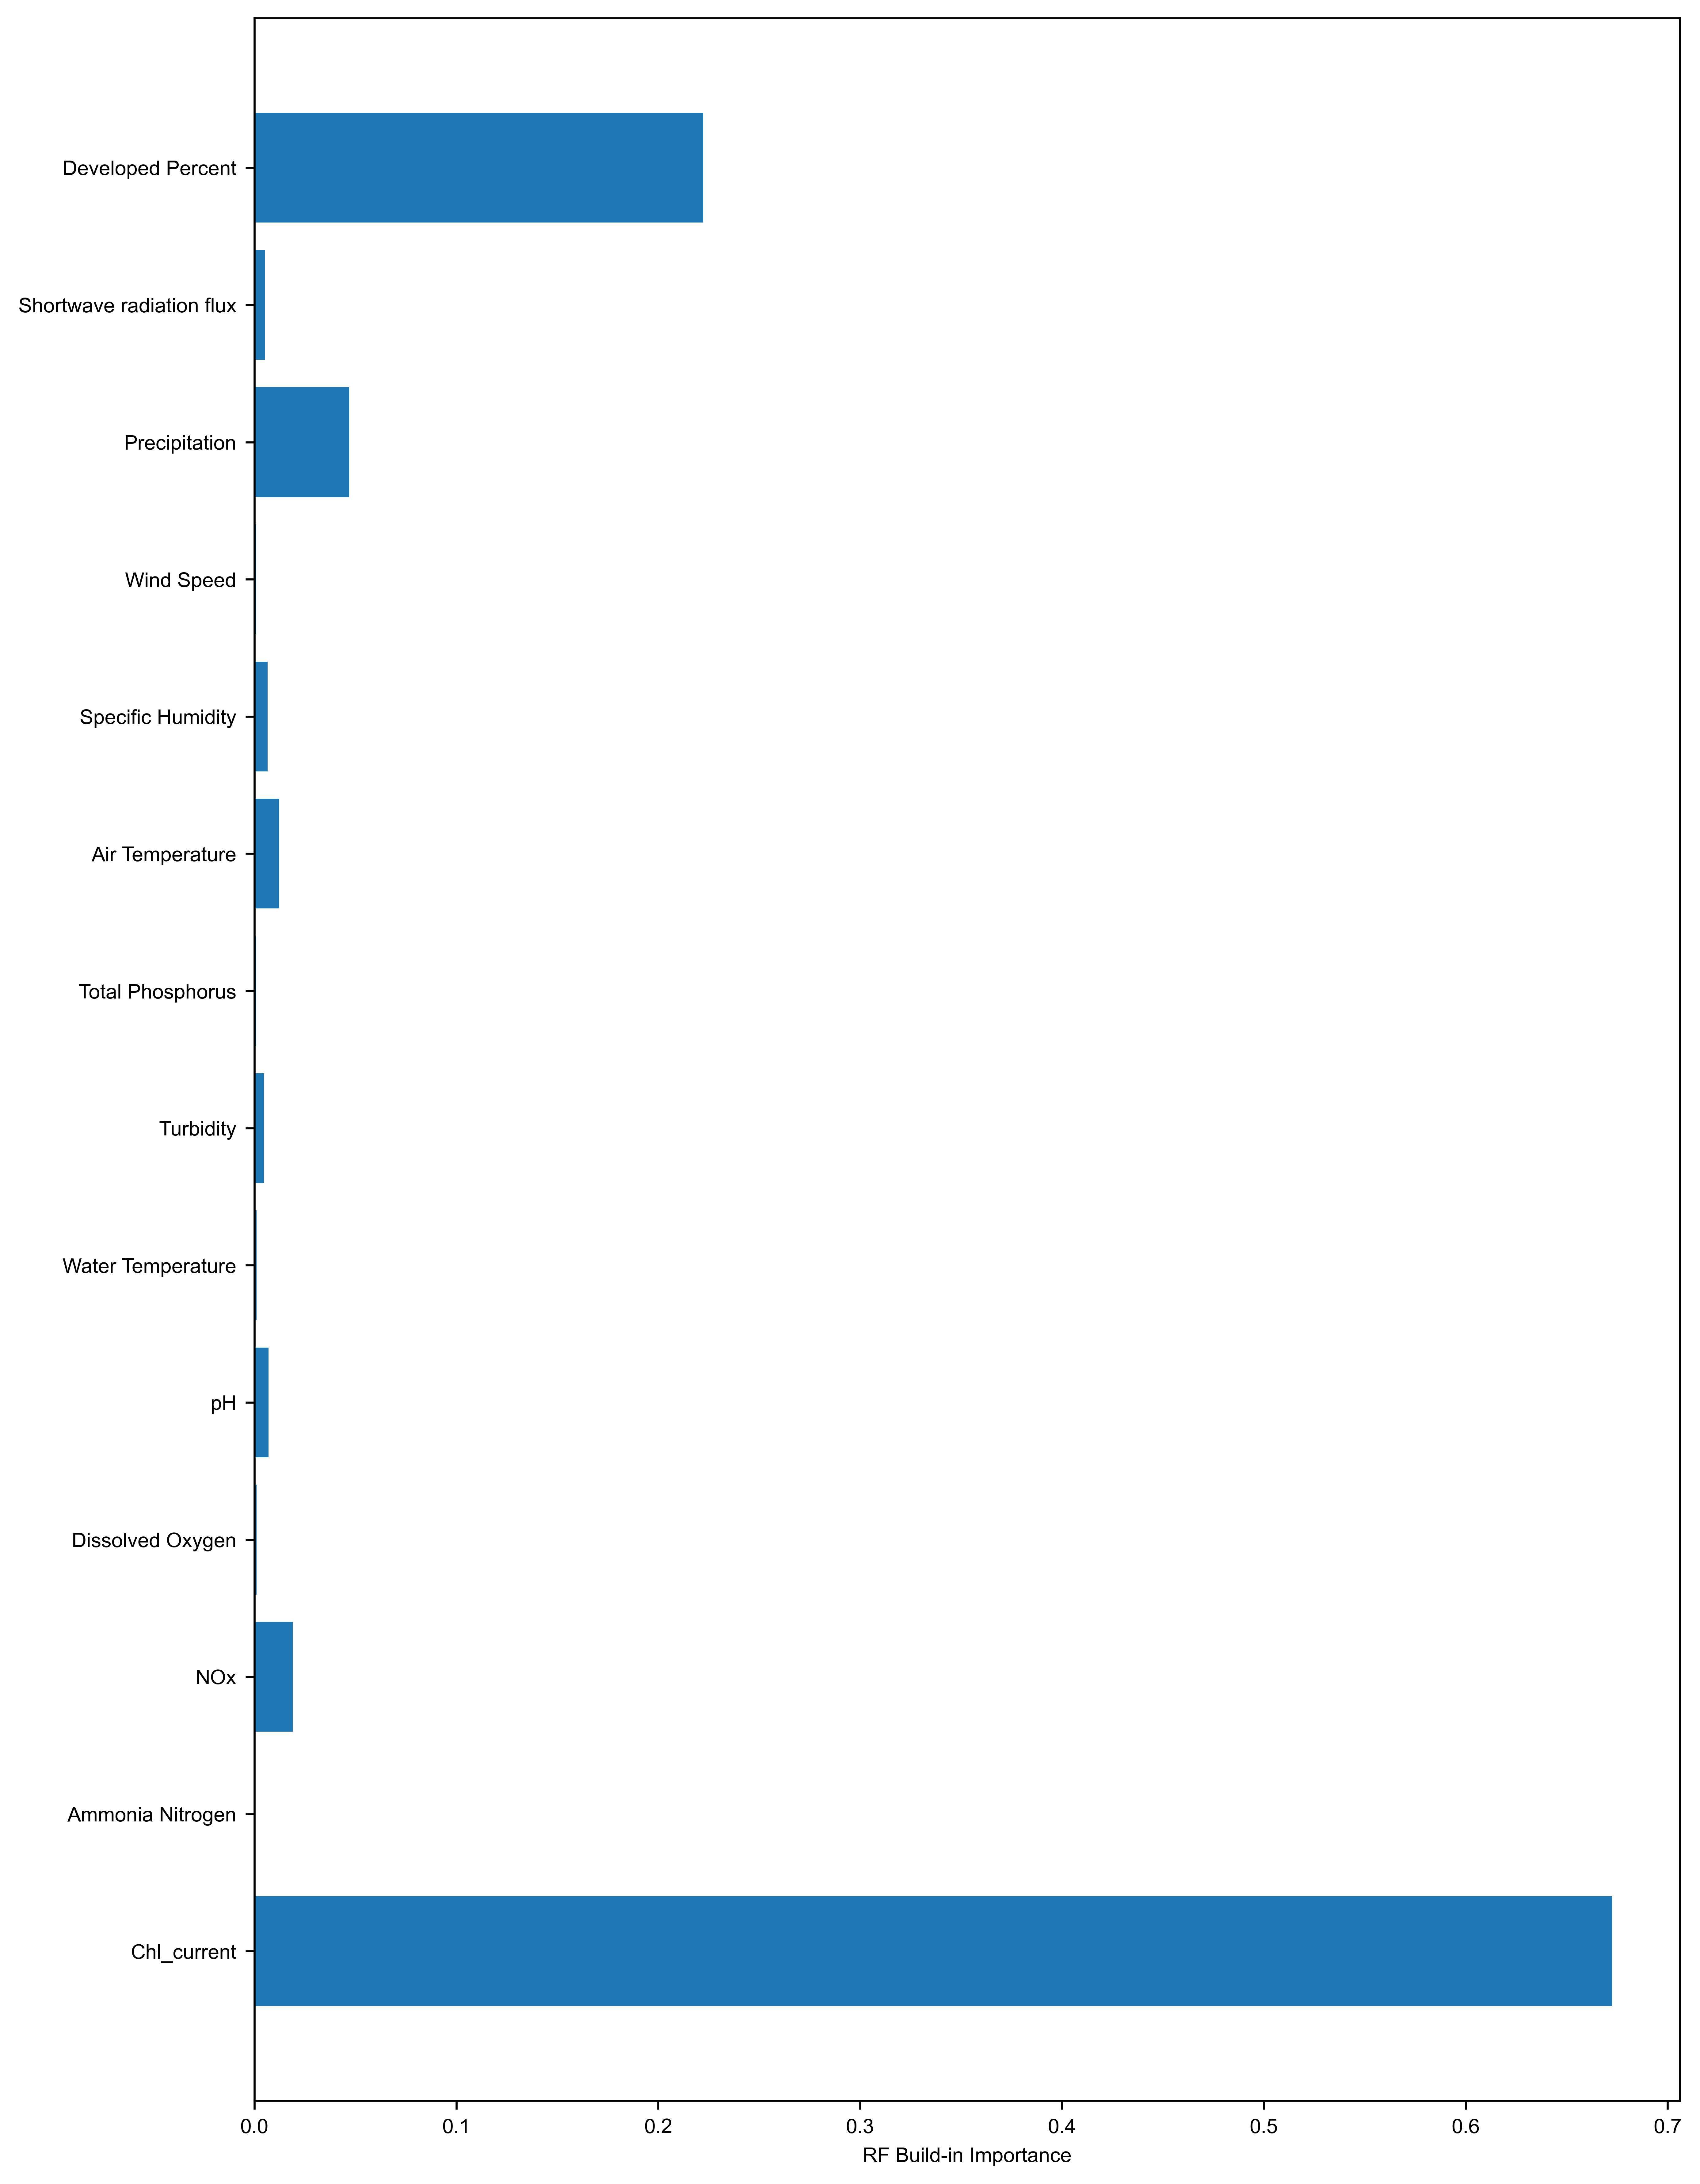

In [310]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = DTR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('DTR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

[ 6.01780077e-01 -2.57993579e-05  2.23882045e-02  1.73081783e-03
 -2.17005587e-03  7.71567458e-04  2.06006279e-03  1.23633626e-03
  1.01027723e-02  1.26522373e-02  0.00000000e+00  4.28900566e-02
  1.14199173e-03  2.52396853e-01]


Text(0.5, 0, 'MLR Permutation Importance')

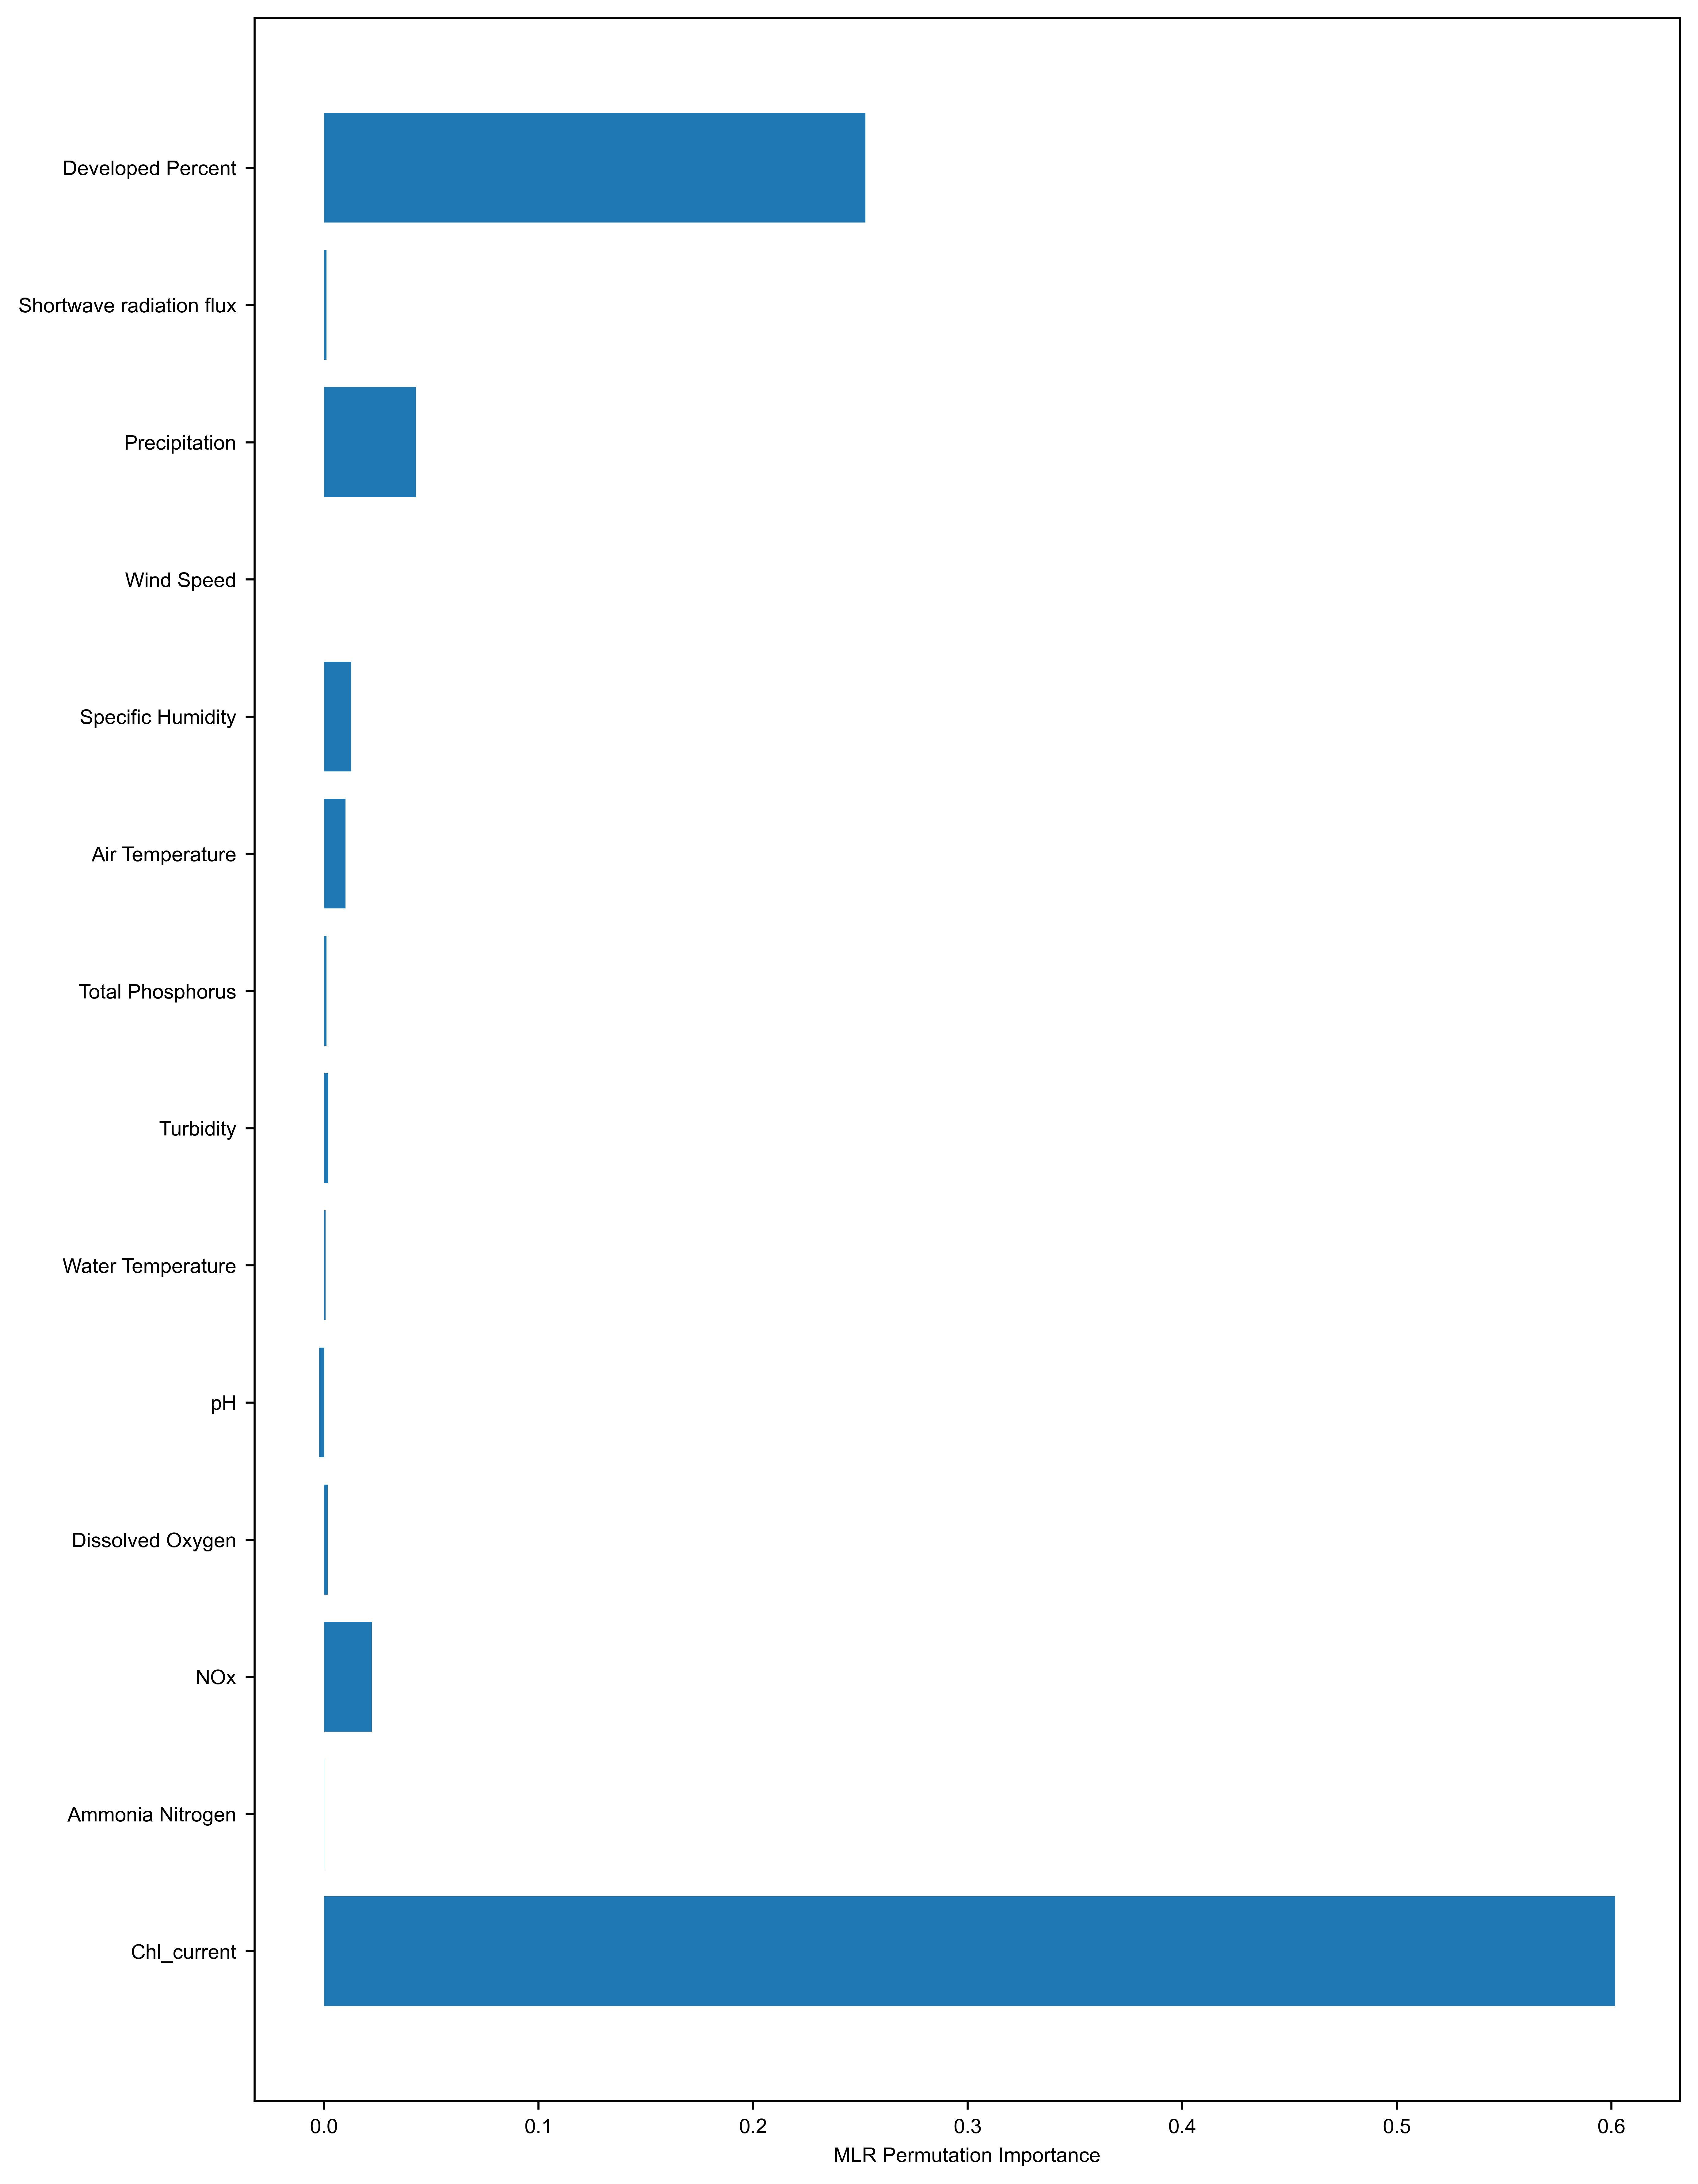

In [311]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(DTR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=600)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("MLR Permutation Importance")

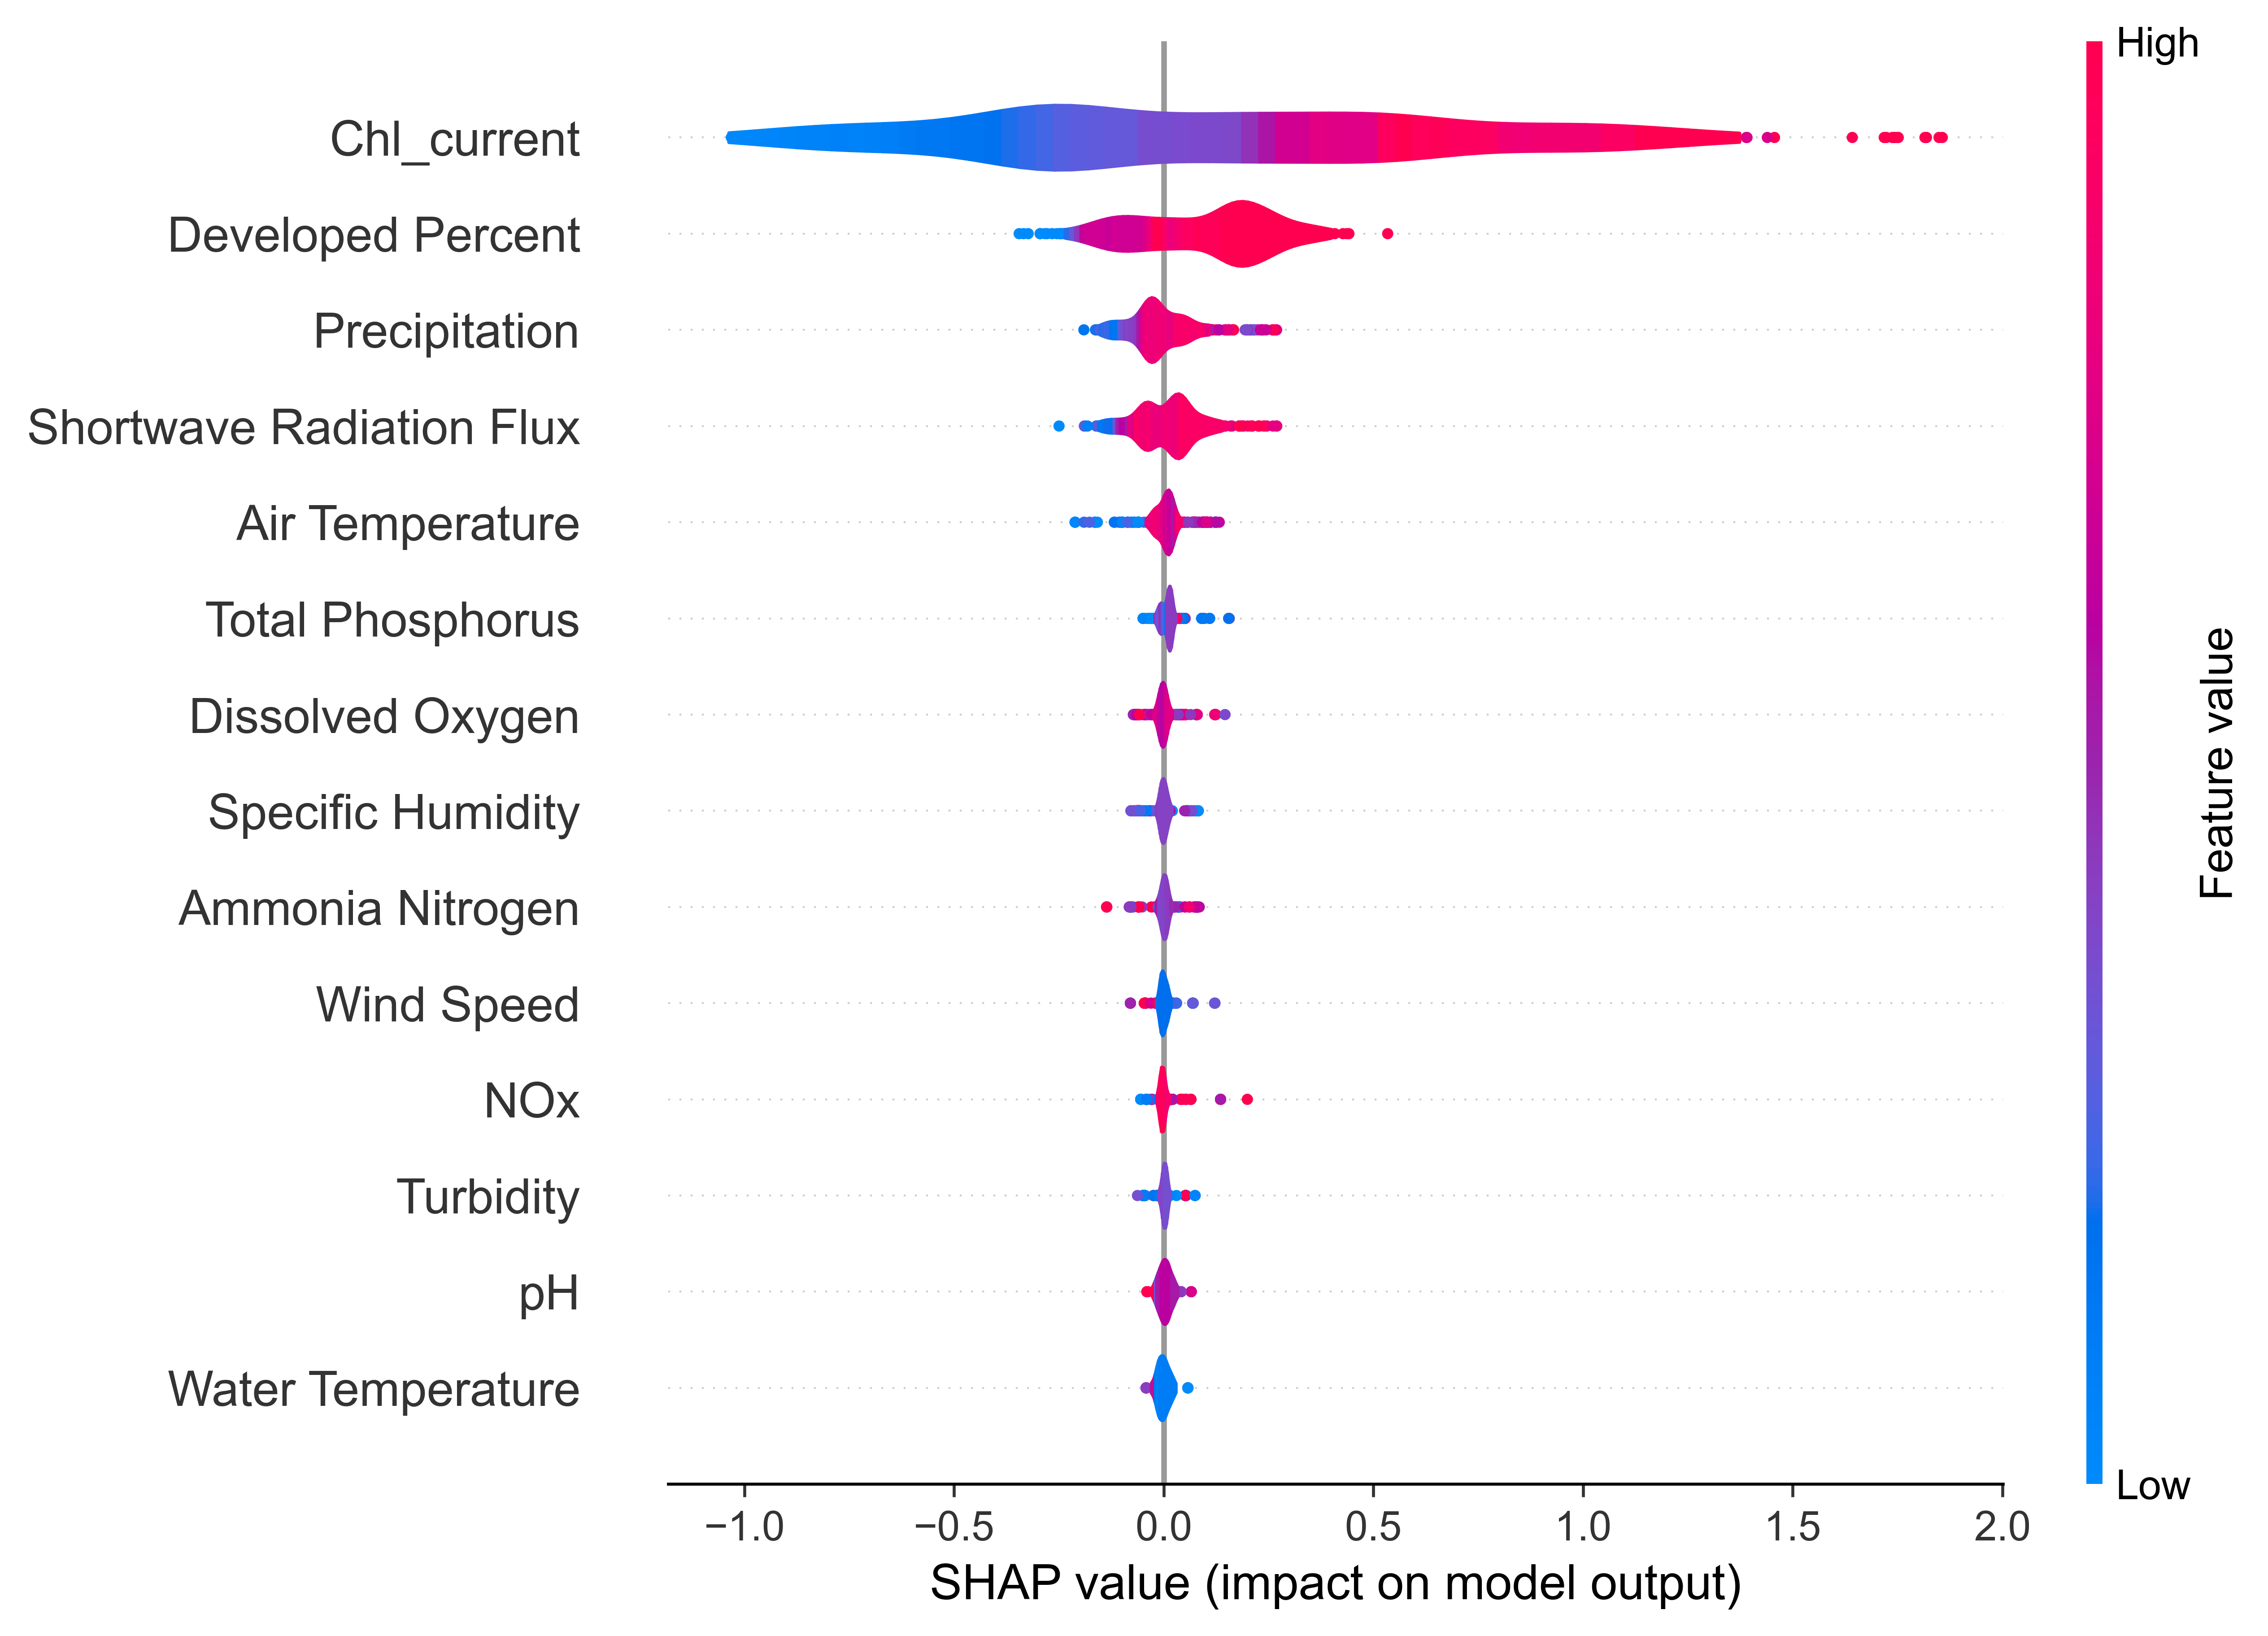

In [493]:
import shap
explainer = shap.TreeExplainer(DTR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [494]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Chl_current,0.505447
13,Developed Percent,0.162593
11,Precipitation,0.062303
12,Shortwave Radiation Flux,0.06047
8,Air Temperature,0.028635
7,Total Phosphorus,0.015696
3,Dissolved Oxygen,0.014011
9,Specific Humidity,0.013362
1,Ammonia Nitrogen,0.01172
10,Wind Speed,0.010372


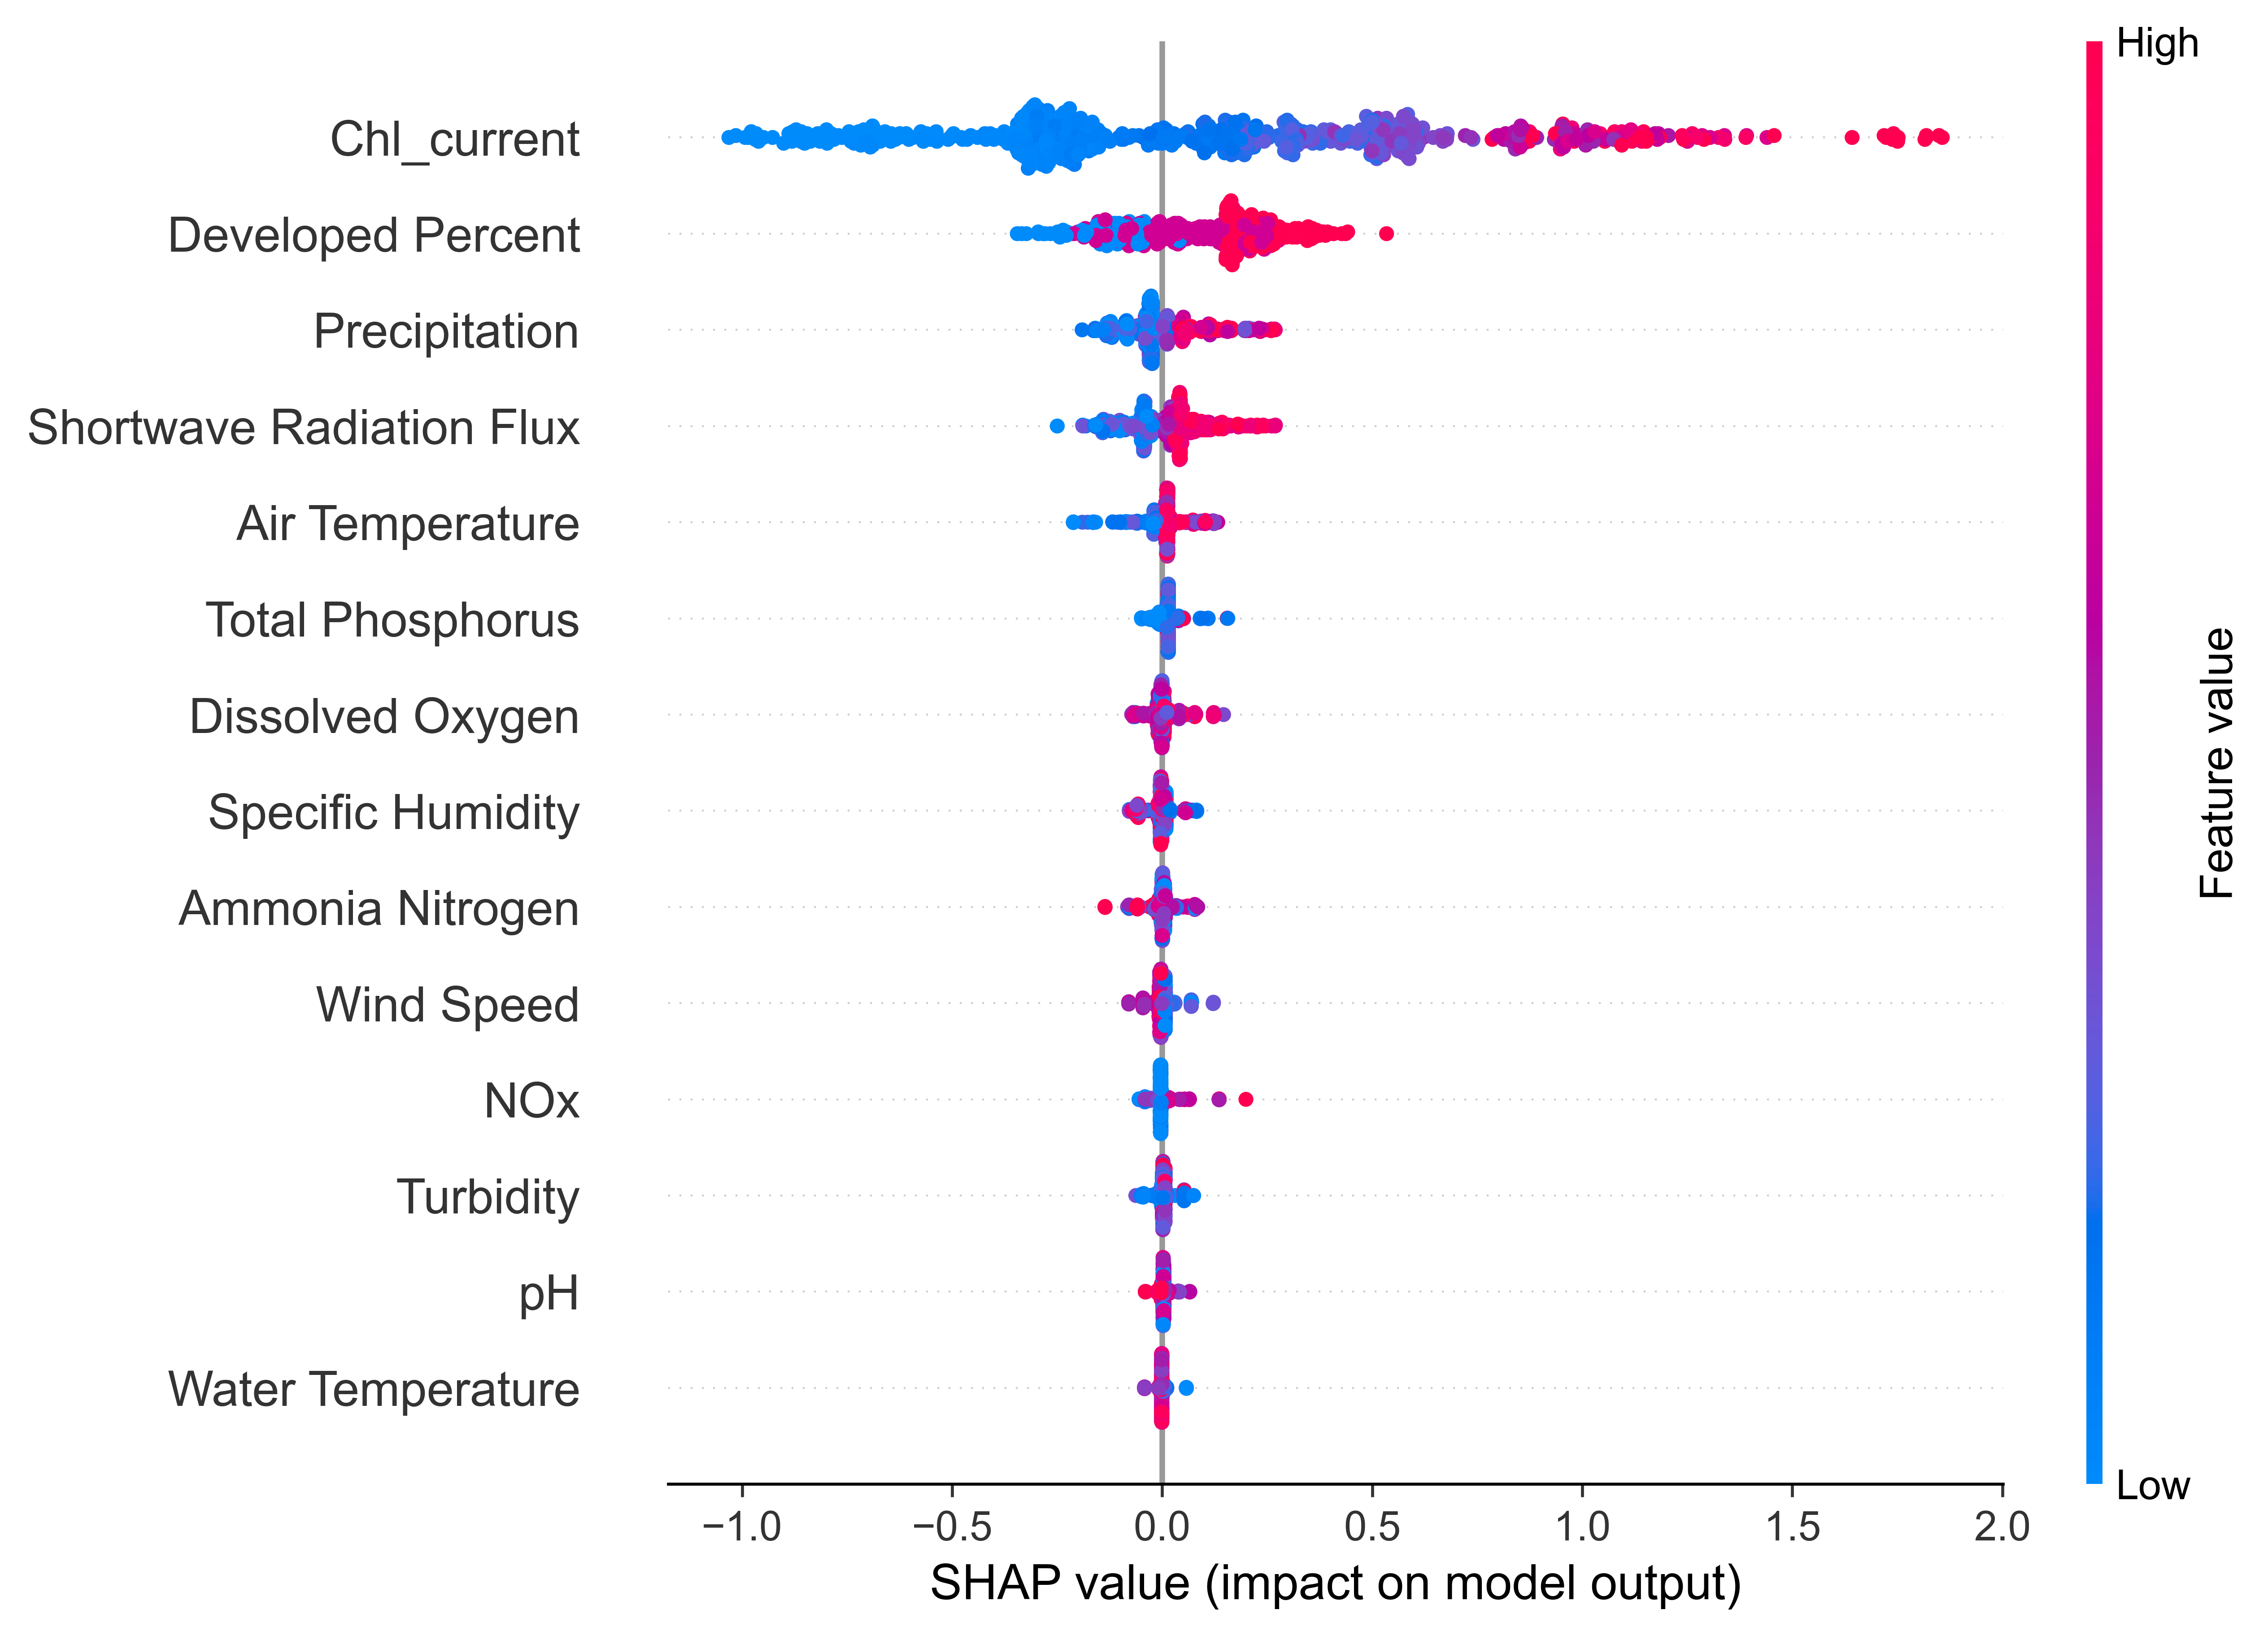

In [495]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [312]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [313]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,3.341915
1,2.860000,4.134550
2,3.692863,3.341915
3,5.130000,4.134550
4,3.646510,2.548263
...,...,...
2731,0.860000,1.241857
2732,0.460000,0.750355
2733,0.540000,0.799189
2734,0.210000,0.799189


In [314]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [315]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_1m_lag,Predicted Chlorophyll-a
2736,6.830000,4.134550
2737,4.349878,4.134550
2738,2.740000,2.528571
2739,2.210000,2.528571
2740,3.870000,1.882800
...,...,...
3451,0.480000,0.558213
3452,0.630000,0.799189
3453,0.930000,0.799189
3454,0.650000,1.206115


In [316]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,3.341915
1,2.860000,4.134550
2,3.692863,3.341915
3,5.130000,4.134550
4,3.646510,2.548263
...,...,...
3451,0.480000,0.558213
3452,0.630000,0.799189
3453,0.930000,0.799189
3454,0.650000,1.206115


In [317]:
All_Y.loc[0]

Chl_1m_lag                 3.759632
Predicted Chlorophyll-a    3.341915
Name: 0, dtype: float64

In [318]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [319]:
import os
import joblib
joblib.dump(DTR, "./DTR_lag.joblib")

['./DTR_lag.joblib']

In [320]:
import os
import joblib
loaded_DTR = joblib.load("./DTR_lag.joblib")

In [321]:
aaaa = loaded_DTR.predict(x)

In [322]:
aaaa

array([3.3419148 , 4.13455019, 3.3419148 , ..., 0.79918919, 1.20611538,
       0.66199685])

In [323]:
len(aaaa)

3456